In [1]:
#1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and 
#summary statistics of the variables. Pre process the data to apply the MLR.

In [2]:
#import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
#load the dataset
df = pd.read_csv(r"E:\DATA sCIENCE\Data set\ToyotaCorolla - MLR.csv")   
df


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [4]:
df.shape

(1436, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [6]:
#counts

In [7]:
df['Doors'].value_counts()

Doors
5    674
3    622
4    138
2      2
Name: count, dtype: int64

In [8]:
df['Cylinders'].value_counts()

Cylinders
4    1436
Name: count, dtype: int64

In [9]:
df['Automatic'].value_counts()

Automatic
0    1356
1      80
Name: count, dtype: int64

In [10]:
df['Gears'].value_counts()

Gears
5    1390
6      43
3       2
4       1
Name: count, dtype: int64

In [11]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

In [12]:
#convert 'FuleType' intp dummy variables (one-hot encoding)
df = pd.get_dummies(df,columns = ['Fuel_Type'], drop_first = True)

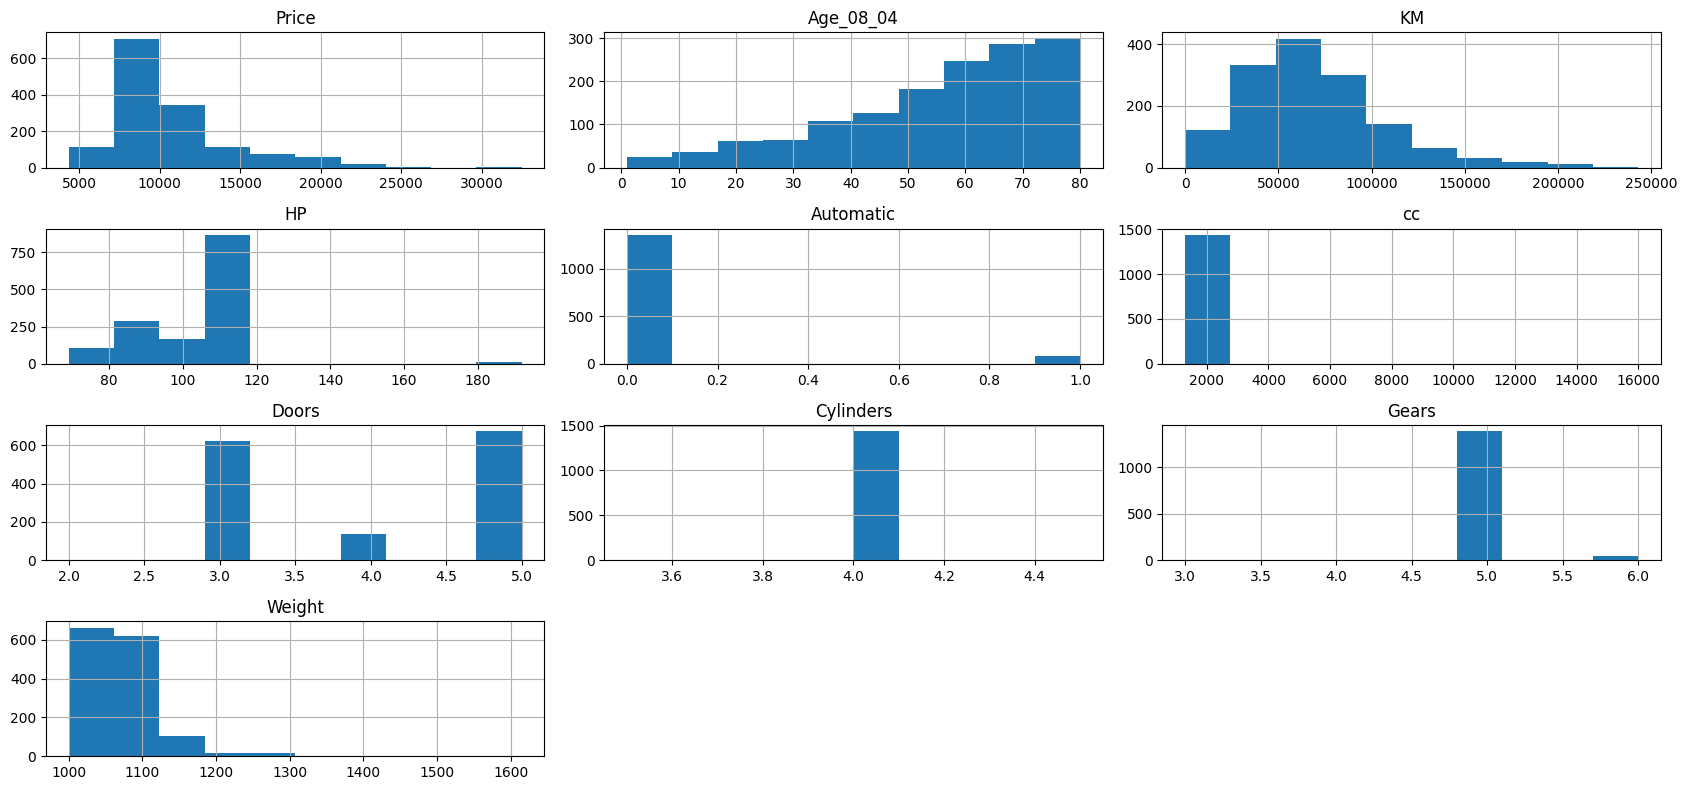

In [13]:
#plot histograph it gives to idea of skewness in the data 
df.hist(figsize = (17,8))
plt.tight_layout()
plt.show()

In [14]:
#The values in the Cylinders columns are the same for all rows, so these columns are not important and can be safely dropped.

In [15]:
#The values in the Cylinders columns are the same for all rows, so these columns are not important and can be safely dropped.
df.drop(columns = ['Cylinders'], inplace = True)
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,True,False
1,13750,23,72937,90,0,2000,3,5,1165,True,False
2,13950,24,41711,90,0,2000,3,5,1165,True,False
3,14950,26,48000,90,0,2000,3,5,1165,True,False
4,13750,30,38500,90,0,2000,3,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,5,1015,False,True


In [16]:
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
Automatic,1436.0,0.055710,0.229441,0.0,0.0,0.0,0.00,1.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Gears,1436.0,5.026462,0.188510,3.0,5.0,5.0,5.00,6.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


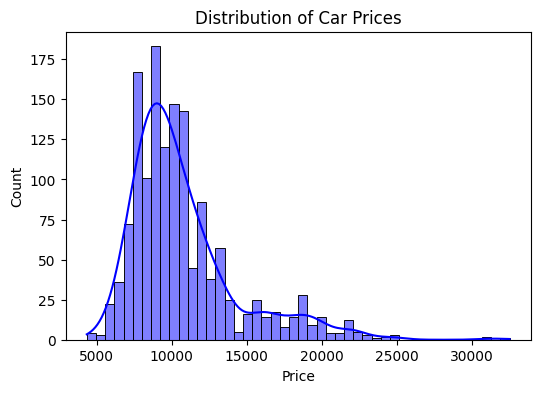

In [17]:
#The histogram of the Price column shows that most cars were purchased around 10,000, indicating that the majority of car prices fall within this range.
plt.figure(figsize=(6,4))
sns.histplot(df['Price'], kde=True, color="blue")
plt.title("Distribution of Car Prices")
plt.show()

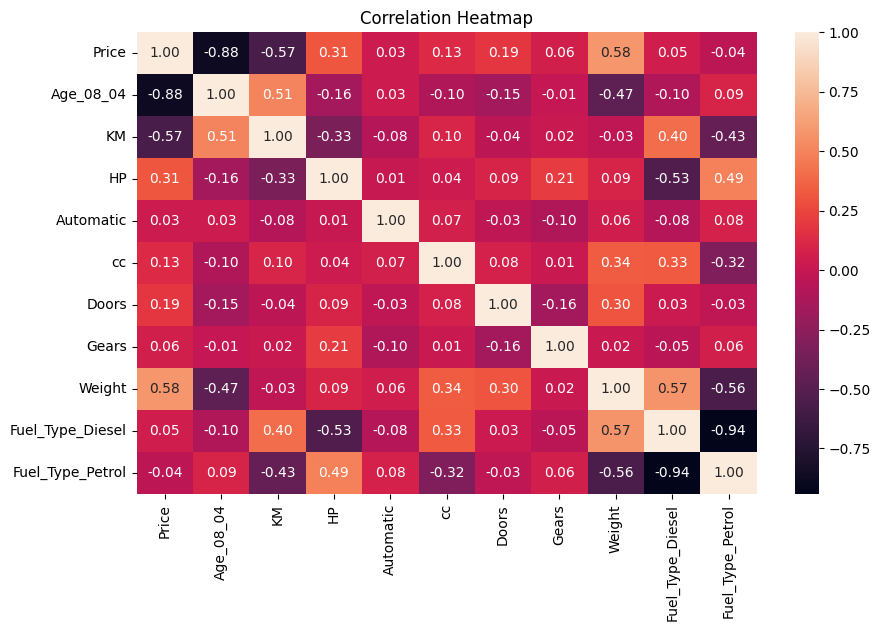

In [18]:
#Correlation matrix it indicate the correlation between two columns
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(numeric_only = True), annot = True, fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

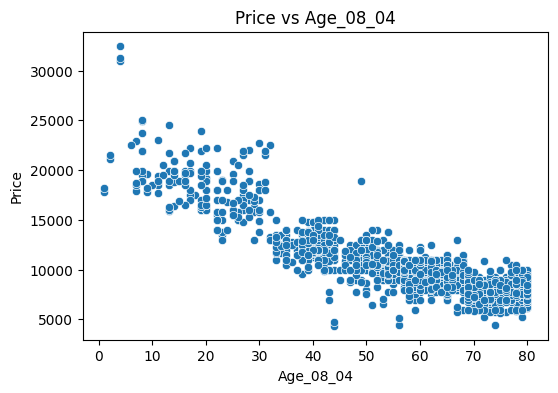

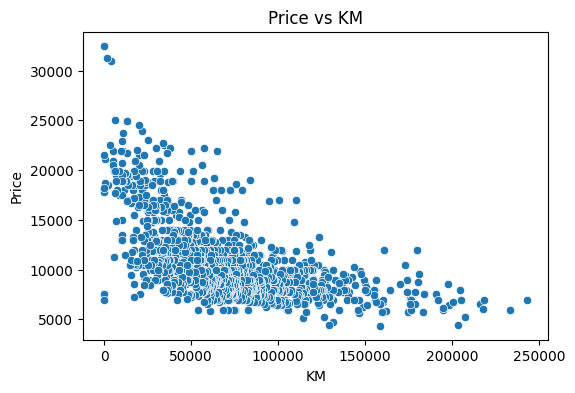

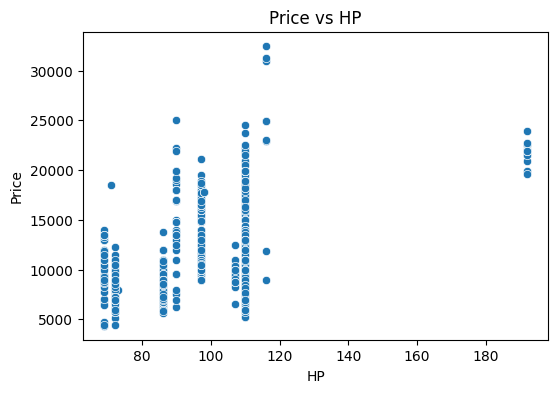

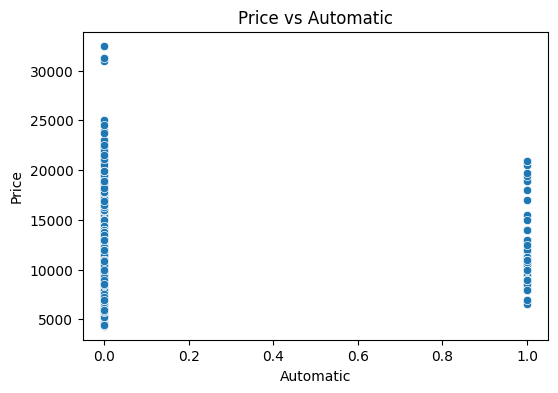

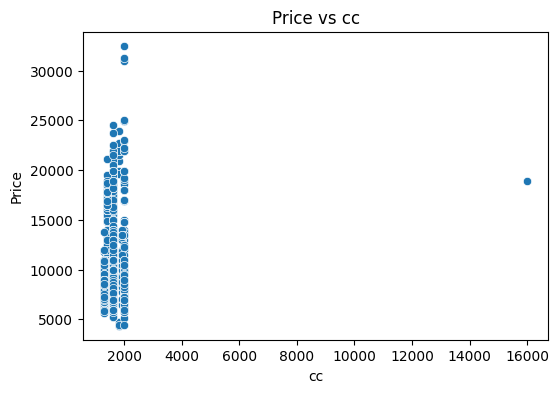

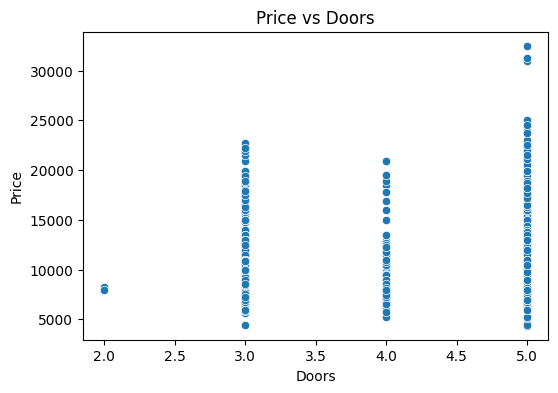

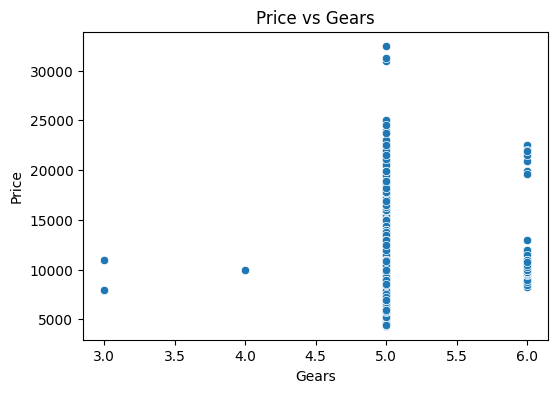

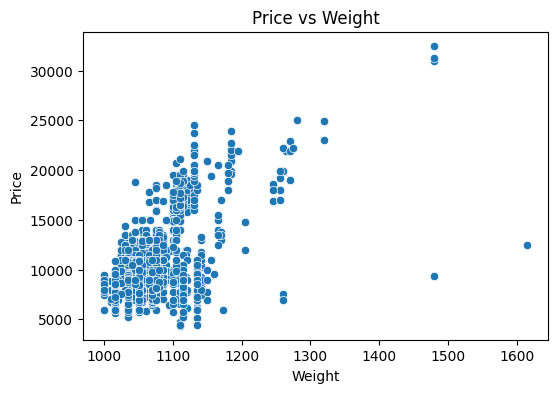

In [19]:
# Scatterplot foe pricw vs predictor

colname = ['Age_08_04','KM','HP','Automatic','cc','Doors','Gears','Weight']

for i in colname:
    plt.figure(figsize = (6,4))
    sns.scatterplot(x=df[i], y=df['Price'])
    plt.title(f"Price vs {i}")
    plt.show()
    

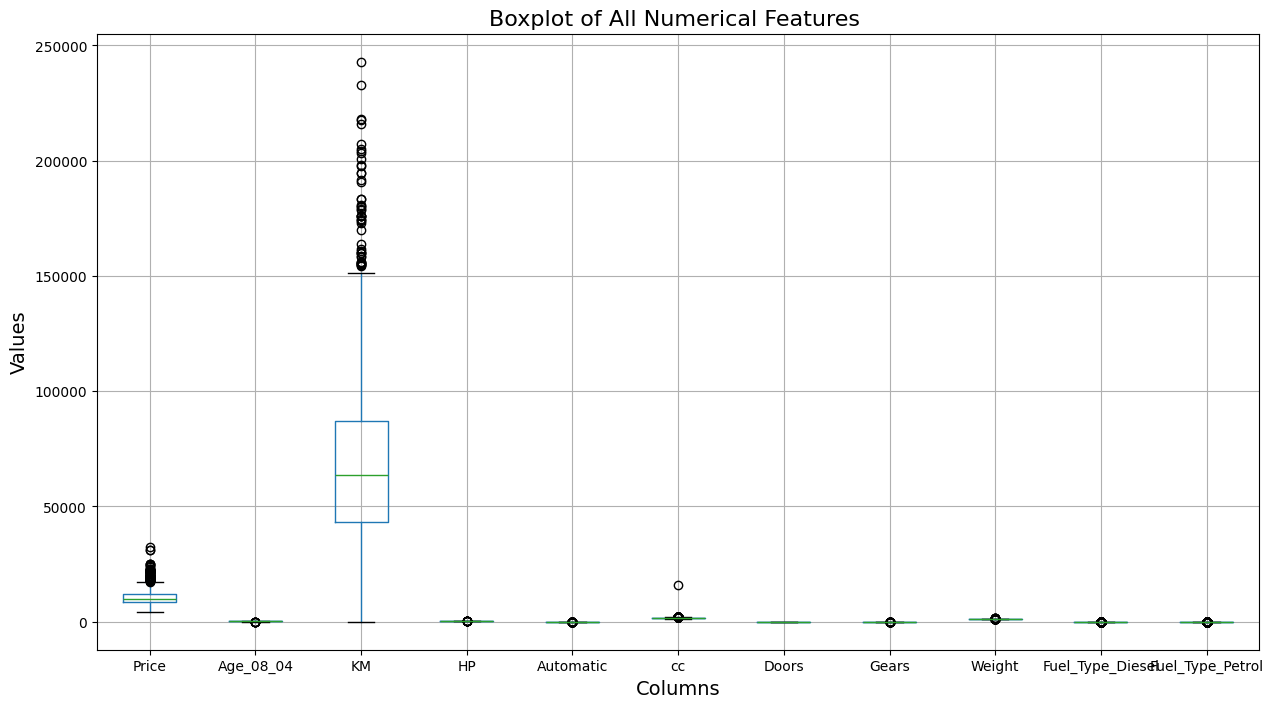

In [20]:
# detect and treat outlier 
df.boxplot(figsize = (15,8))
plt.title("Boxplot of All Numerical Features ", fontsize=16)
plt.xlabel("Columns", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.show()


In [21]:
# it show that outlier are present in the dataset so remove the outlier

select_column = ['Price','Age_08_04','KM','HP','cc','Doors','Gears','Weight']
for colname in select_column:
    q1 = df[colname].quantile(0.25)
    q3 = df[colname].quantile(0.75)
    iqr = q3-q1
    upper_extreme = q3 + (1.5*iqr)
    lower_extreme = q1 - (1.5*iqr)

    df.loc[df[colname] > upper_extreme, colname] = upper_extreme
    df.loc[df[colname] < lower_extreme, colname] = lower_extreme

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16460\2129605391.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '153051.875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[colname] > upper_extreme, colname] = upper_extreme
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16460\2129605391.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1152.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[colname] > upper_extreme, colname] = upper_extreme


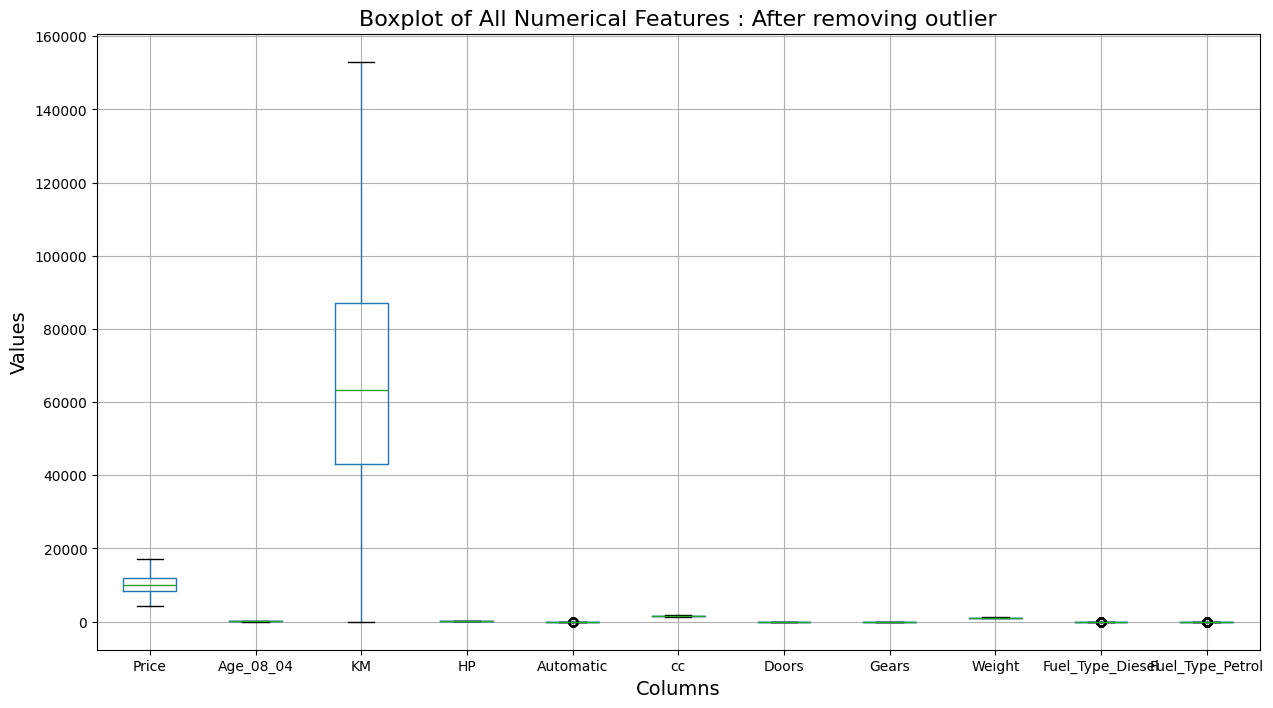

In [22]:
#dont remove the Automatic column outlier because it is column o and 1 present .
df.boxplot(figsize = (15,8))
plt.title("Boxplot of All Numerical Features : After removing outlier", fontsize=16)
plt.xlabel("Columns", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.show()

In [23]:
"""
by using scatterplot it show that : 
From the comparison between the Age and Price columns : it is observed that when the age of the car is low, the price is high.
As the age of the car increases, the price decreases. This shows a negative correlation between the car’s age and its price 
its correlated to each other..

From the comparison between the Price and Kilometers (KM) columns, it is observed that when the kilometers driven 
are in the range of 50,000 to 100,000, the price falls within a smaller range of 5,000 to 10,000. As the kilometers driven increase,
the price of the car decreases. This indicates a negative relationship between kilometers and price.
Its correlated to each other.

In Automatic column 0 means that not automatic car and 1 represent that automatic car.

The other column do not show a strong correlation with each other.
"""

'\nby using scatterplot it show that : \nFrom the comparison between the Age and Price columns : it is observed that when the age of the car is low, the price is high.\nAs the age of the car increases, the price decreases. This shows a negative correlation between the car’s age and its price \nits correlated to each other..\n\nFrom the comparison between the Price and Kilometers (KM) columns, it is observed that when the kilometers driven \nare in the range of 50,000 to 100,000, the price falls within a smaller range of 5,000 to 10,000. As the kilometers driven increase,\nthe price of the car decreases. This indicates a negative relationship between kilometers and price.\nIts correlated to each other.\n\nIn Automatic column 0 means that not automatic car and 1 represent that automatic car.\n\nThe other column do not show a strong correlation with each other.\n'

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
y = df['Price']


In [26]:
#Pre process the data to apply the MLR

# Define the different model based on adding features step by step from higest corelation
# with price and find r2 for find that how our model is good or bad.

# Model1 : using only Age_08_04
x_model1 = df[['Age_08_04']]
model1 = LinearRegression()
model1.fit(x_model1, y)
y_pred1 = model1.predict(x_model1)
r2_model1 = r2_score(y, y_pred1)



In [27]:
# model2 : using Age_08_04+KM

x_model2 = df[['Age_08_04','KM']]
model2 = LinearRegression()
model2.fit(x_model2, y)
y_pred2 = model2.predict(x_model2)
r2_model2 = r2_score(y, y_pred2)


In [28]:
# model3 : using Age_08_04+KM+HP

x_model3 = df[['Age_08_04','KM','HP']]
model3 = LinearRegression()
model3.fit(x_model3, y)
y_pred3 = model3.predict(x_model3)
r2_model3 = r2_score(y, y_pred3)

    

In [29]:
# model4 : using Age_08_04+KM+HP+Automatic

x_model4 = df[['Age_08_04','KM','HP','Automatic']]
model4 = LinearRegression()
model4.fit(x_model4, y)
y_pred4 = model4.predict(x_model4)
r2_model4 = r2_score(y, y_pred4)

    

In [30]:
# model5 : using Age_08_04+KM+HP+Automatic+cc

x_model5 = df[['Age_08_04','KM','HP','Automatic','cc']]
model5 = LinearRegression()
model5.fit(x_model5, y)
y_pred5 = model5.predict(x_model5)
r2_model5 = r2_score(y, y_pred5)

    

In [31]:
# model6 : using Age_08_04+KM+HP+Automatic+cc+Doors

x_model6 = df[['Age_08_04','KM','HP','Automatic','cc','Doors']]
model6 = LinearRegression()
model6.fit(x_model6, y)
y_pred6 = model6.predict(x_model6)
r2_model6 = r2_score(y, y_pred6)

    

In [32]:
# model7 : using Age_08_04+KM+HP+Automatic+cc+Doors+Weight

x_model7 = df[['Age_08_04','KM','HP','Automatic','cc','Doors','Weight']]  
model7 = LinearRegression()
model7.fit(x_model7, y)
y_pred7 = model7.predict(x_model7)
r2_model7 = r2_score(y, y_pred7)

    

In [33]:
model_results = pd.DataFrame({
    "Model" : ['Age_08_04','Age_08_04+KM','Age_08_04+KM+HP','Age_08_04+KM+HP+Automatic',
               'Age_08_04+KM+HP++Automatic+cc','Age_08_04+KM+HP+Automatic+cc+Doors',
               'Age_08_04+KM+HP+Automatic+cc+Doors+Weight'],
    'R2_squared' : [r2_model1,r2_model2,r2_model3,r2_model4,r2_model5,r2_model6,r2_model7] ,
})
print(model_results)

                                       Model  R2_squared
0                                  Age_08_04    0.802329
1                               Age_08_04+KM    0.826790
2                            Age_08_04+KM+HP    0.835892
3                  Age_08_04+KM+HP+Automatic    0.838083
4              Age_08_04+KM+HP++Automatic+cc    0.841010
5         Age_08_04+KM+HP+Automatic+cc+Doors    0.843004
6  Age_08_04+KM+HP+Automatic+cc+Doors+Weight    0.864329


In [81]:
#check te multicollinerity 
# define inpedent variable (x) as Age and dependent variable (y) as KM

x_age = df[['Age_08_04']]
y_KM = df[['KM']]

#fit a linear regression model
model_age_KM = LinearRegression()
model_age_KM.fit(x_age,y_KM)

#predict door using hp
y_KM_pred = model_age_KM.predict(x_age)

#calculate R-squared for the model
r2_age_KM = r2_score(y_KM , y_KM_pred)

#calculate VIF using R-squared
vif_age_KM = 1/(1 - r2_age_KM)

#Display the results
print("R square: ", r2_age_KM)
print("VIF : ",vif_age_KM)

R square:  0.28285272539265405
VIF :  1.3944137214319363


In [35]:
# no multicollinearity present in the dataset.

In [82]:
#2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
# select features (non -numeric column)
x = df[['Age_08_04','KM','HP','cc','Doors','Automatic','Gears','Weight']]

#target variable
y = df['Price']


In [84]:
#split the data (80% train, 20% test)  
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 42 )

In [85]:
#shapes the splits
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1148, 8), (288, 8), (1148,), (288,))

In [86]:
#3.Build a multiple linear regression model using the training dataset. 
#Interpret the coefficients of the model. Build a minimum of 3 different models.

In [87]:
#creating first model

Model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [88]:
#interpreted the coefficients of the model
model1.coef_

array([-1.05892479e+02, -1.58027842e-02,  2.65486606e+01, -2.38308813e+00,
       -8.28558598e+01,  5.54403754e+00,  0.00000000e+00,  2.36871454e+01])

In [89]:
#4.Evaluate the performance of the model using appropriate 
#evaluation metrics on the testing dataset.

y_train_pred = model1.predict(x_train)
y_test_pred = model1.predict(x_test)

In [90]:
# model Accuracy

print("First Model Accuracy : ")
print("Train R-Squared : ", r2_score(y_train, y_train_pred))
print("Test R-sQuared : ", r2_score(y_test, y_test_pred))

First Model Accuracy : 
Train R-Squared :  0.8645009163985089
Test R-sQuared :  0.8632033110631708


In [91]:
#creating second model
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, random_state = 44)


In [92]:
Model2 = LinearRegression()
model2.fit(x_train2, y_train2)

LinearRegression()

In [93]:
#interpreted the coefficients of the model
model2.coef_

array([-1.04495958e+02, -1.67019234e-02,  2.60324062e+01, -2.19395570e+00,
       -5.91828719e+01,  2.63658747e+01,  0.00000000e+00,  2.24729907e+01])

In [94]:
#4.Evaluate the performance of the model using appropriate 
#evaluation metrics on the testing dataset.

y_train_pred2 = model2.predict(x_train2)
y_test_pred2 = model2.predict(x_test2)

In [95]:
# model Accuracy

print("First Model Accuracy : ")
print("Train R-Squared : ", r2_score(y_train2, y_train_pred2))
print("Test R-sQuared : ", r2_score(y_test2, y_test_pred2))

First Model Accuracy : 
Train R-Squared :  0.8603191397123716
Test R-sQuared :  0.8789359325910409


In [96]:
#creating Third model
x_train3, x_test3,y_train3, y_test3 = train_test_split(x , y, test_size = 0.2, random_state = 21)

In [97]:
Model3 = LinearRegression()
model3.fit(x_train3, y_train3)

LinearRegression()

In [98]:
#interpreted the coefficients of the model
model2.coef_

array([-1.04495958e+02, -1.67019234e-02,  2.60324062e+01, -2.19395570e+00,
       -5.91828719e+01,  2.63658747e+01,  0.00000000e+00,  2.24729907e+01])

In [99]:
#4.Evaluate the performance of the model using appropriate 
#evaluation metrics on the testing dataset.

y_train_pred3 = model3.predict(x_train3)
y_test_pred3 = model3.predict(x_test3)

In [100]:
# model Accuracy

print("First Model Accuracy : ")
print("Train R-Squared : ", r2_score(y_train3, y_train_pred3))
print("Test R-sQuared : ", r2_score(y_test3, y_test_pred3))

First Model Accuracy : 
Train R-Squared :  0.8657565474331149
Test R-sQuared :  0.8564619094928939


In [101]:
#5.Apply Lasso and Ridge methods on the model.

from sklearn.linear_model import Lasso, LassoCV

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

In [104]:
for alpha_val in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    lasso_custom = Lasso(alpha = alpha_val, max_iter = 10000)
    lasso_custom.fit(x_train,y_train)

    y_test_pred = lasso_custom.predict(x_test)
    r2_test = r2_score(y_test, y_test_pred)
    non_zero_count = sum(lasso_custom.coef_!= 0)

    print(f"\nAlpha : {alpha_val}")
    print(f"Test R2 : {r2_test:.4f}")
    print(f"Retained Features : {non_zero_count}")


Alpha : 0.1
Test R2 : 0.8611
Retained Features : 7

Alpha : 0.2
Test R2 : 0.8611
Retained Features : 7

Alpha : 0.3
Test R2 : 0.8611
Retained Features : 7

Alpha : 0.4
Test R2 : 0.8611
Retained Features : 7

Alpha : 0.5
Test R2 : 0.8611
Retained Features : 7

Alpha : 0.6
Test R2 : 0.8611
Retained Features : 7

Alpha : 0.7
Test R2 : 0.8611
Retained Features : 7

Alpha : 0.8
Test R2 : 0.8611
Retained Features : 7

Alpha : 0.9
Test R2 : 0.8611
Retained Features : 7

Alpha : 1
Test R2 : 0.8611
Retained Features : 6


In [110]:
#final model with alpha = 0.7

final_alpha = 0.9
final_lasso = Lasso(alpha = final_alpha, max_iter = 10000)
final_lasso.fit(x_train, y_train)

Lasso(alpha=0.9, max_iter=10000)

In [112]:
#final evaluation

y_train_final = final_lasso.predict(x_train)
y_test_final = final_lasso.predict(x_test)

print("Final Lasso Train R-Squared:", np.round(r2_score(y_train, y_train_final)*100,2))
print("Final Lasso Test R-Squared:", np.round(r2_score(y_test, y_test_final)*100,2))

Final Lasso Train R-Squared: 86.47
Final Lasso Test R-Squared: 86.11


In [ ]:
"""Interview Questions:


1.What is Normalization & Standardization and how is it helpful?
-> Normalization scales data into a fixed range 0–1, while Standardization transforms it to have mean 0 and standard deviation 1. and the range is (-1 to 1)
Both help models train efficiently by ensuring that all features contribute equally and optimization converges faste.
for Min_Max normalization formula  = (X-Xmin) / (xmax-Xmin) and for Standarlization formula = (X-mean)/S.D
its helpful beacause it's gives Better accurt means two or more independent variables are highly correlated — they carry similar information.acy, improves interpretability, improve better performances..


2.What techniques can be used to address multicollinearity in multiple linear regression?
->  Multicollinearity means two or more independent variables are highly correlated because it makes regression coefficients unstable 
and hard to interpret.
If detect multicollinearity, first check correlations and VIF values. Then may remove redundant featuresor apply Ridge/Lasso regression to 
reduce the effect.




